In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
n = 0.25 * (stats.norm.ppf(0.95)-stats.norm.ppf(0.1))**2
print(n)

2.1409618376669934


In [ ]:
T = 5.0 / 41**0.5

In [ ]:
print(T)

0.7808688094430304


In [ ]:
import math

# Function to compute binomial coefficient C(n, k)
def binomial_coeff(n, k):
    return math.comb(n, k)

# Function to compute the binomial probability P(X = k)
def binomial_probability(n, k, p):
    return binomial_coeff(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Function to calculate the sum from k = 11 to k = 100
def calculate_binomial_sum(n, p):
    total_sum = 0
    for k in range(11, 101):
        total_sum += binomial_probability(n, k, p)
    return total_sum

# Example values
n = 100  # total number of trials
p = 0.05  # probability of success

# Calculate the sum
result = calculate_binomial_sum(n, p)
print(f"Sum from k=11 to k=100: {result}")

Sum from k=11 to k=100: 0.011472410067484659


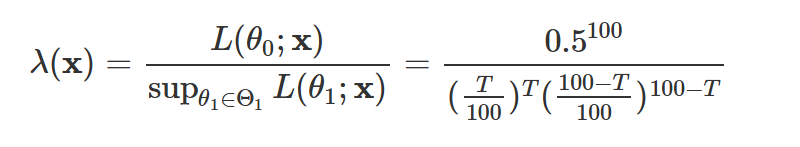

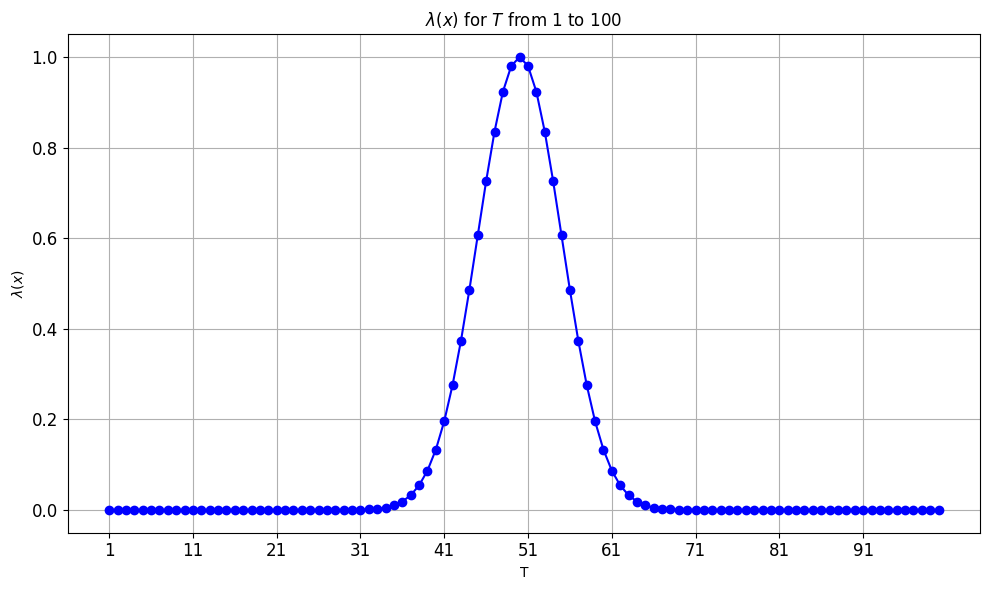

In [2]:
import math
import matplotlib.pyplot as plt

def calculate_lambda(T):
    # Calculate the likelihood for theta_0
    L_theta0 = 0.5 ** 100

    # Calculate the likelihood for theta_1
    L_theta1 = (T / 100) ** T * ((100 - T) / 100) ** (100 - T)

    # Calculate lambda(x)
    lambda_x = L_theta0 / L_theta1
    return lambda_x

# Calculate lambda(x) for T from 1 to 100
lambda_values = [calculate_lambda(T) for T in range(1, 101)]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), lambda_values, marker='o', linestyle='-', color='b')
plt.title(r'$\lambda(x)$ for $T$ from 1 to 100')
plt.xlabel('T')
plt.ylabel(r'$\lambda(x)$')
plt.grid(True)
plt.xticks(range(1, 101, 10))  # Set x-ticks to show every 10 values
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

In [3]:
from scipy.stats import binom

def find_critical_value_and_r(n, theta_0, alpha):
    """
    Find the critical value c and weight r that satisfy the significance level alpha.

    Parameters:
    n (int): Sample size.
    theta_0 (float): Probability under the null hypothesis.
    alpha (float): Significance level.

    Returns:
    tuple: (c, r) where c is the critical value and r is the weight, or (None, None) if not found.
    """
    for c in range(n + 1):
        prob_c_plus = 1 - binom.cdf(c, n, theta_0)  # P(T(X) > c | θ = θ0)
        prob_c = binom.pmf(c, n, theta_0)  # P(T(X) = c | θ = θ0)

        if prob_c_plus <= alpha:
            r = (alpha - prob_c_plus) / prob_c if prob_c > 0 else 1
            return c, r
    return None, None

def find_sample_size_with_r(theta_0, theta_1, alpha, beta_target):
    """
    Find the sample size n that satisfies the significance level alpha and the Type II error target beta_target.

    Parameters:
    theta_0 (float): Probability under the null hypothesis.
    theta_1 (float): Probability under the alternative hypothesis.
    alpha (float): Significance level.
    beta_target (float): Type II error target.

    Returns:
    tuple: (n, c, r, beta) where n is the sample size, c is the critical value, r is the weight, and beta is the Type II error, or (None, None, None, None) if not found.
    """
    for n in range(1, 10000):
        c, r = find_critical_value_and_r(n, theta_0, alpha)
        if c is not None:
            prob_c_less = binom.cdf(c - 1, n, theta_1)  # P(T(X) < c | θ = θ1)
            prob_c = binom.pmf(c, n, theta_1)  # P(T(X) = c | θ = θ1)

            beta = prob_c_less + (1 - r) * prob_c
            if beta <= beta_target:
                return n, c, r, beta
    return None, None, None, None

# Parameter settings
alpha = 0.05  # Significance level
beta_target = 0.01  # Type II error target
theta_0 = 0.01  # Probability under the null hypothesis
theta_1 = 0.1  # Probability under the alternative hypothesis

# Calculate sample size n, critical value c, weight r, and Type II error beta
n, c, r, beta = find_sample_size_with_r(theta_0, theta_1, alpha, beta_target)

# Print the results
print(f"Sample size (n): {n}")
print(f"Critical value (c): {c}")
print(f"Weight (r): {r}")
print(f"Type II error (beta): {beta}")

Sample size (n): 81
Critical value (c): 2
Weight (r): 0.013682221388016773
Type II error (beta): 0.009723740730358466
